## How to get started with the TopoAnalysis module

This notebook has a simple example of loading data and performing flow routing and accumulation area calculations using TopoAnalysis objects.

First, we add the main code directory to our path. This allows us to import from the module.

In [1]:
import sys
sys.path.append('../')

Now we import the main classes we want to use: `Elevation` for loading a DEM, and others for common calculations in geomorphology.

In [2]:
from dem import Area, Elevation, FilledElevation, FlowDirectionD8, FlowLength, LogArea

And a couple of common libraries

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

All of these objects have a `load` method to read a file.

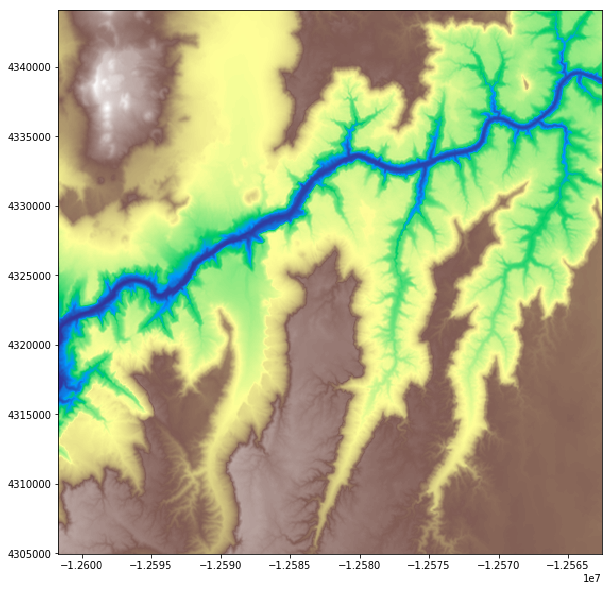

In [4]:
elev = Elevation.load('data/grandcanyon.tif')
im = elev.plot(cmap='terrain')

The various calculation classes take other objects as input. For example, first we pit fill the original DEM.

In [5]:
filled = FilledElevation(elevation=elev)

Then we can route flow over this data and compute accumulation area.

In [6]:
flow_dir = FlowDirectionD8(flooded_dem=filled)
flow_len = FlowLength(flow_direction=flow_dir)
area = Area(flow_direction=flow_dir)

Finally, the `plot` method creates a simple plot of the data. In this case we specified a color ramp (gray) to make visualizing log accumulation area easier.

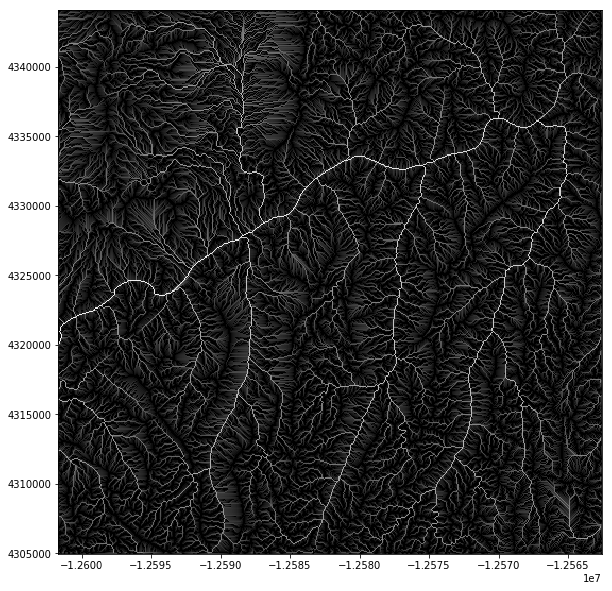

In [7]:
logarea = LogArea(area=area)
logarea.plot(cmap='gray')